In [37]:
import numpy as np
import pandas as pd
import seaborn as sns


In [38]:
data = pd.read_csv("mymoviedb.csv", engine='python')

In [39]:
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [41]:
data['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [42]:
#check Duplicate Value
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool

In [43]:
data.duplicated().sum()

0

In [44]:
data.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


## Basics Summary Point
1. we have a data point consistent Row 9837 and column 9
2. Our data look a bit tidy not have any non and duplicate value in our data
3. Relese column date which only have yaer
4. overview and language is not a useful then remove this column
5. there is noticable outliers in popularity column
6. vote_averes is batter in catagriese
7. genre column have coama sipret value these remove white space 

In [45]:
row = data.iloc[1106]
print(row)

Release_Date          - Just Desserts
Title                            None
Overview                         None
Popularity                        NaN
Vote_Count                       None
Vote_Average                     None
Original_Language                None
Genre                            None
Poster_Url                       None
Name: 1106, dtype: object


In [46]:
#data = data.drop(index=1106)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [47]:
data['Release_Date']=pd.to_datetime(data['Release_Date'],errors='coerce')
print(data['Release_Date'].dtypes)

datetime64[ns]


In [48]:
data['Release_Date']=data['Release_Date'].dt.year
data['Release_Date'] = data['Release_Date'].astype('Int64') 

In [49]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## DROPING THE COLUMN

In [50]:
cols=['Overview','Original_Language','Poster_Url']
data.drop(cols,axis =1,inplace=True)

In [51]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [52]:
def catagarize(data,col,labels):
    edges=[data[col].describe['min'],
           data[col].describe['25%'],
           data[col].describe['50%'],
           data[col].discribe['75%'],
           data[col].discribe['max']]
    data[col]=pd.cut(data[col],edges,labels=labels,duplicates='drope')
    return data
    

In [53]:
data['Vote_Average'].value_counts()

Vote_Average
6.4          435
6.3          429
6.5          427
6.8          423
6.7          420
            ... 
9.2            1
1.5            1
3.1            1
Animation      1
10.0           1
Name: count, Length: 75, dtype: int64

In [54]:
data['Vote_Average'].value_counts()

Vote_Average
6.4          435
6.3          429
6.5          427
6.8          423
6.7          420
            ... 
9.2            1
1.5            1
3.1            1
Animation      1
10.0           1
Name: count, Length: 75, dtype: int64

## Data Visualization 

In [55]:
sns.set_style('whitegrid')

# What is the most frequent genre of Movies  Relesed In Netflix

In [56]:
data['Genre'].describe()

count      9826
unique     2337
top       Drama
freq        466
Name: Genre, dtype: object

In [57]:
import matplotlib.pyplot as plt

In [58]:
data['Genre']=data['Genre'].str.split(',')

1) Most frequent genre: Drama (3744 movies)


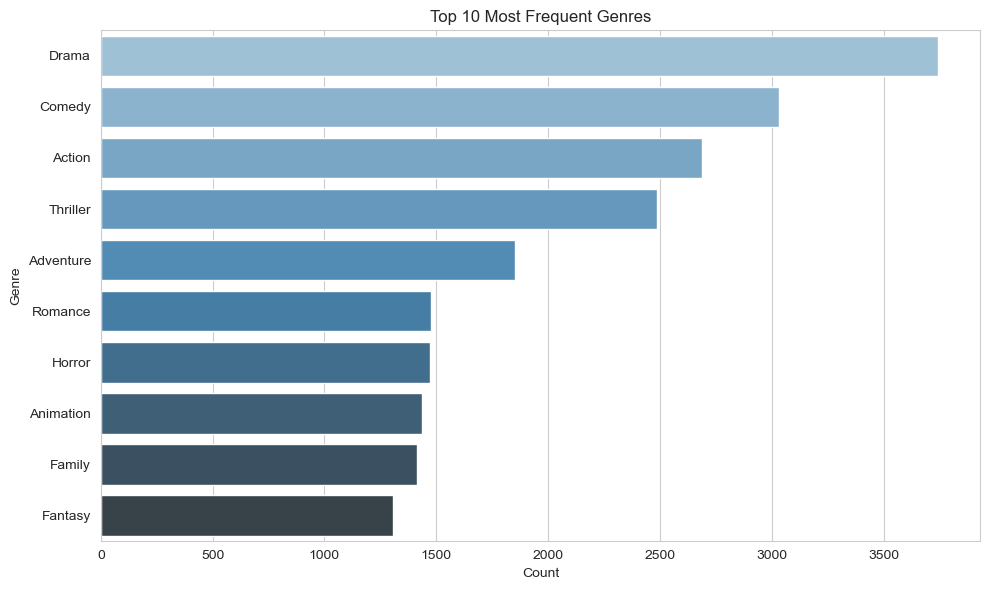

In [59]:
most_common_genre = genre_df.iloc[0]
print(f"1) Most frequent genre: {most_common_genre['Genre']} ({most_common_genre['Count']} movies)")

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette="Blues_d")
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

## High popularity  movies 

In [60]:
data.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,8.1,"[Crime, Mystery, Thriller]"


In [61]:
data[data['Popularity']==data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"[Action, Adventure, Science Fiction]"


## Lowe Popularity gane movies

In [62]:
data[data['Popularity']==data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
1115,<NA>,61.328,7.1,en,Animation,None


## Which year whose large amount movies relised

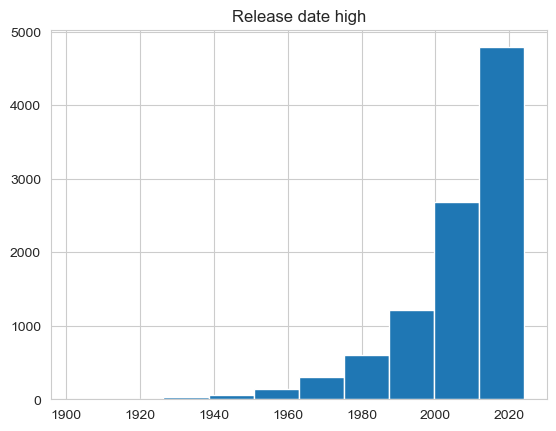

In [64]:
data['Release_Date'].hist()
plt.title("Release date high")
plt.show()

### <mid>Result of this Project </mid>